In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import joblib

# Load Data

In [18]:
root_dir = './'
local_path_biome = '/bd_mir_bioma_without_xy.csv'
file_path_biome = root_dir + local_path_biome

df_biome = pd.read_csv(file_path_biome)

In [19]:
df_biome_caatinga = df_biome.where(df_biome['Bioma'] == 'Caatinga').dropna(axis = 0)
df_biome_caatinga_data = df_biome_caatinga.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_caatinga_target = pd.DataFrame(df_biome_caatinga, columns=['Carbon_gkg'])

In [20]:
df_biome_test = pd.read_csv('./bd_mir_biome_test_without_xy.csv')

In [21]:
df_biome_test_caatinga = df_biome_test.where(df_biome_test['Bioma'] == 'Caatinga').dropna(axis = 0)
df_biome_test_caatinga_data = df_biome_test_caatinga.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_caatinga_data = df_biome_test_caatinga_data.apply(lambda x:np.log(1/x))
df_biome_test_caatinga_target = pd.DataFrame(df_biome_test_caatinga, columns=['Carbon_gkg'])

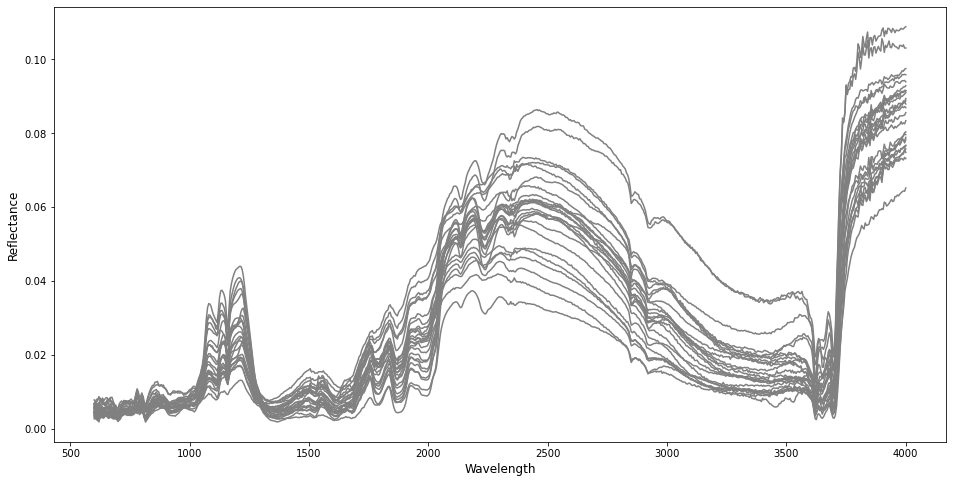

In [22]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_test_caatinga_data)):
    
    test_row = df_biome_caatinga_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_test_caatinga_data)
df_biome_test_caatinga_data_tr = pd.DataFrame(X,columns=df_biome_test_caatinga_data.columns)

## Preprocess

In [24]:
df_biome_caatinga

,ID_Unico,Bioma,Carbon_gkg,4000,3995,3990,3985,3980,3975,3970,...,645,640,635,630,625,620,615,610,605,600
360,33766.0,Caatinga,16.900000,0.087937,0.088470,0.08877,0.087610,0.088140,0.08802,0.088110,...,0.00444,0.00456,0.004800,0.00315,0.004190,0.00542,0.004990,0.00536,0.005680,0.00586
361,33858.0,Caatinga,13.600000,0.103080,0.103070,0.10394,0.103480,0.103720,0.10383,0.102850,...,0.00633,0.00690,0.007800,0.00698,0.008280,0.00857,0.007690,0.00722,0.007370,0.00681
362,33893.0,Caatinga,17.500000,0.091466,0.091640,0.09108,0.091060,0.091030,0.09018,0.089960,...,0.00439,0.00487,0.004930,0.00421,0.005050,0.00441,0.004350,0.00506,0.005280,0.00567
363,33939.0,Caatinga,6.200000,0.078891,0.077880,0.07813,0.078270,0.077440,0.07680,0.077580,...,0.00466,0.00564,0.005530,0.00603,0.005330,0.00589,0.005570,0.00493,0.004850,0.00484
364,47183.0,Caatinga,0.597429,0.089407,0.088473,0.08824,0.087931,0.087979,0.08722,0.086876,...,0.00578,0.00551,0.005659,0.00534,0.005106,0.00538,0.004924,0.00554,0.005158,0.00461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,33813.0,Caatinga,36.400000,0.071295,0.071410,0.07060,0.070920,0.070830,0.07107,0.070210,...,0.00244,0.00295,0.002740,0.00375,0.003280,0.00349,0.004770,0.00402,0.003840,0.00483
536,33672.0,Caatinga,35.200000,0.057388,0.057350,0.05730,0.056930,0.056790,0.05617,0.057110,...,0.00417,0.00455,0.004600,0.00320,0.003090,0.00347,0.004240,0.00540,0.004960,0.00620
537,47212.0,Caatinga,0.194475,0.073456,0.072823,0.07272,0.072393,0.072204,0.07114,0.071198,...,0.00400,0.00427,0.004576,0.00471,0.003601,0.00431,0.003983,0.00428,0.004906,0.00525
538,47145.0,Caatinga,0.106494,0.104335,0.103725,0.10367,0.104169,0.103595,0.10327,0.103245,...,0.00718,0.00646,0.006490,0.00691,0.007277,0.00703,0.007402,0.00622,0.006157,0.00638


In [25]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

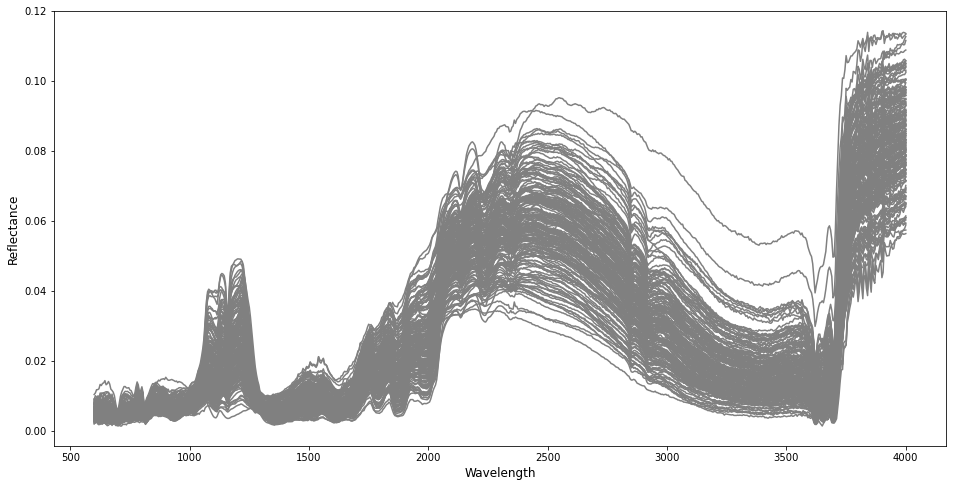

In [26]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_caatinga_data)):
    
    test_row = df_biome_caatinga_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [27]:
#Converting data from reflectance values to absorbance values
from math import log, exp

df_biome_caatinga_data = df_biome_caatinga_data.apply(lambda x:np.log(1/x))

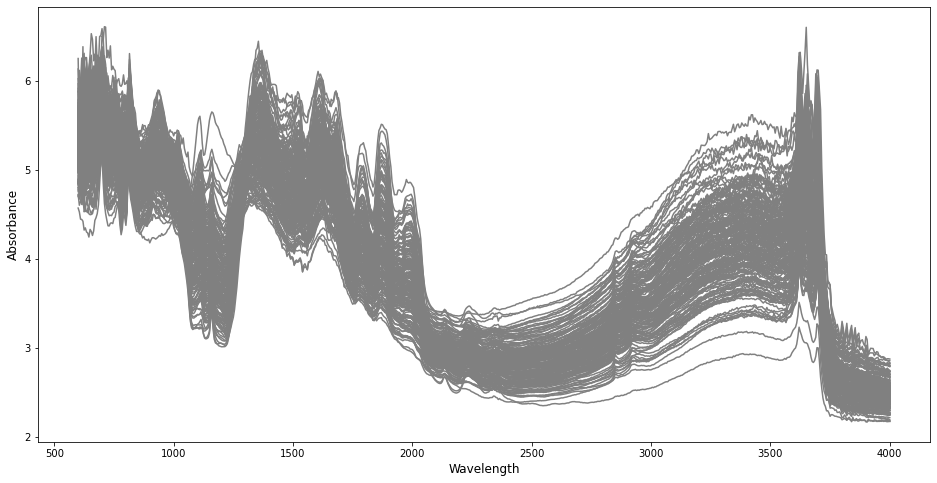

In [28]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_caatinga_data)):
    
    test_row = df_biome_caatinga_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [29]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

v = scipy.signal.savgol_filter(df_biome_caatinga_data,21,3)
for i in range(len(df_biome_caatinga_data)):
    for j in range(len(df_biome_caatinga_data.iloc[i])):
        df_biome_caatinga_data.iloc[i][j] = v[i][j]

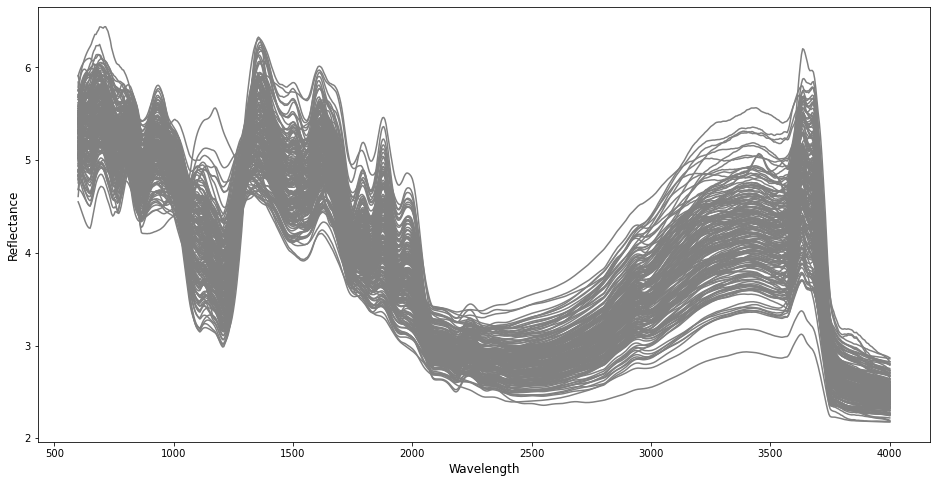

In [30]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_caatinga_data)):
    
    test_row = df_biome_caatinga_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [31]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_caatinga_data)
df_biome_caatinga_data_tr = pd.DataFrame(X,columns=df_biome_caatinga_data.columns)
df_biome_caatinga_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.407443,-0.423591,-0.436445,-0.446475,-0.454091,-0.459654,-0.463492,-0.465902,-0.467167,-0.467553,...,0.216595,0.216614,0.205406,0.178693,0.130802,0.054167,-0.060516,-0.221513,-0.427149,-0.652288
1,-1.417262,-1.442152,-1.462212,-1.478357,-1.491352,-1.501847,-1.510411,-1.517554,-1.523743,-1.529414,...,-1.343425,-1.361547,-1.385504,-1.415775,-1.452196,-1.492552,-1.529642,-1.546345,-1.512031,-1.393660
2,-0.654682,-0.648651,-0.645029,-0.643540,-0.643883,-0.645746,-0.648805,-0.652732,-0.657194,-0.661857,...,0.115716,0.120872,0.117090,0.103379,0.078078,0.038715,-0.017797,-0.093761,-0.186671,-0.283711
3,0.345670,0.347439,0.349394,0.351622,0.354186,0.357130,0.360484,0.364271,0.368506,0.373196,...,-0.541342,-0.526882,-0.505392,-0.475090,-0.433239,-0.375681,-0.296530,-0.189145,-0.050915,0.107186
4,-0.476947,-0.459270,-0.444868,-0.433339,-0.424280,-0.417295,-0.411995,-0.407998,-0.404930,-0.402422,...,-0.506941,-0.509087,-0.500123,-0.477828,-0.438739,-0.377576,-0.286922,-0.158556,0.010340,0.205163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.989030,0.972170,0.958006,0.946285,0.936709,0.928959,0.922701,0.917595,0.913302,0.909483,...,1.271792,1.272786,1.263542,1.238530,1.189908,1.105923,0.969155,0.756994,0.451332,0.064288
176,2.410375,2.383596,2.359915,2.339133,2.320917,2.304847,2.290450,2.277223,2.264652,2.252214,...,0.649366,0.667442,0.671686,0.655729,0.610959,0.525306,0.382420,0.163935,-0.138909,-0.501767
177,0.784083,0.804728,0.820539,0.832300,0.840698,0.846338,0.849769,0.851495,0.851995,0.851726,...,0.522774,0.514977,0.502764,0.484364,0.457165,0.417169,0.358457,0.273524,0.156975,0.014646
178,-1.488591,-1.491049,-1.491563,-1.490581,-1.488436,-1.485368,-1.481560,-1.477158,-1.472278,-1.467027,...,-1.232331,-1.247622,-1.258975,-1.264918,-1.262636,-1.246625,-1.206493,-1.124682,-0.978684,-0.757284


## Model 1

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [75]:
forest_reg_caatinga_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,100,200]}
gsearch = GridSearchCV(forest_reg_caatinga_setup, param_grid)
forest_reg_caatinga = gsearch.fit(df_biome_caatinga_data_tr, df_biome_caatinga_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [77]:
Y_predict_caatinga_forest = forest_reg_caatinga.predict(df_biome_test_caatinga_data_tr)
m = mean_squared_error(df_biome_test_caatinga_target, Y_predict_caatinga_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_caatinga_target, Y_predict_caatinga_forest)))

root_mean_squared_error: 8.996893819652328
R2: 0.03729127461301174


In [78]:
joblib.dump(forest_reg_caatinga, './model/cattinga/forest_reg_caatinga.pkl')

['./model/cattinga/forest_reg_caatinga.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

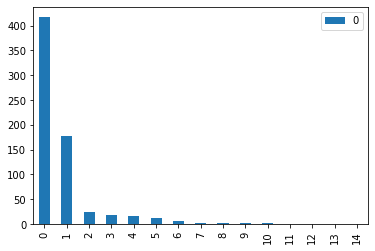

In [19]:
#PCA
df_biome_caatinga_data_tr_ = df_biome_caatinga_data_tr
ew_caatinga, ev_caatinga = np.linalg.eig(np.cov(df_biome_caatinga_data_tr_.T))
ew_caatinga_order = np.argsort(ew_caatinga)[::-1]
ew_caatinga_sort = ew_caatinga[ew_caatinga_order]
ev_caatinga_sort = ev_caatinga[:,ew_caatinga_order]
pd.DataFrame(ew_caatinga_sort[0:15]).plot(kind='bar')

In [20]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [21]:
pca_caatinga = PCA(n_components=10)
pca_caatinga.fit(df_biome_caatinga_data_tr)
df_biome_caatinga_data_tr_pca = pca_caatinga.transform(df_biome_caatinga_data_tr)

ols_caatinga = linear_model.LinearRegression()
ols_caatinga.fit(df_biome_caatinga_data_tr_pca, df_biome_caatinga_target)

LinearRegression()

In [22]:
df_biome_test_caatinga_data_tr_pca = pca_caatinga.transform(df_biome_test_caatinga_data_tr)
Y_predict_caatinga_pca = ols_caatinga.predict(df_biome_test_caatinga_data_tr_pca)
m = mean_squared_error(df_biome_test_caatinga_target, Y_predict_caatinga_pca)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_caatinga_target, Y_predict_caatinga_pca)))

root_mean_squared_error: 8.537687614373272
R2: 0.13305761010111072


In [79]:
joblib.dump(pca_caatinga, './model/cattinga/pca_caatinga.pkl')

['./model/cattinga/pca_caatinga.pkl']

In [80]:
joblib.dump(ols_caatinga, './model/cattinga/ols_caatinga.pkl')

['./model/cattinga/ols_caatinga.pkl']

In [23]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [24]:
pls_model_caatinga_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,20)}
gsearch = GridSearchCV(pls_model_caatinga_setup, param_grid)
pls_model_caatinga = gsearch.fit(df_biome_caatinga_data_tr, df_biome_caatinga_target)

In [25]:
Y_predict_caatinga_pls = pls_model_caatinga.predict(df_biome_test_caatinga_data_tr)
m = mean_squared_error(df_biome_test_caatinga_target, Y_predict_caatinga_pls)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_caatinga_target, Y_predict_caatinga_pls)))

root_mean_squared_error: 9.197232863866992
R2: -0.006060465032160067


In [81]:
joblib.dump(pls_model_caatinga, './model/cattinga/pls_model_caatinga.pkl')

['./model/cattinga/pls_model_caatinga.pkl']

## Model 2

In [ ]:
df_biome_caatinga_data_tr,df_biome_caatinga_target
df_biome_test_caatinga_data_tr,df_biome_test_caatinga_target

In [51]:
def band_select(df):
    index_2268 = []
    for i in range(2265,2391,5):
        index_2268.append(str(i))
    index_2268.sort(reverse=True)
    indexs_bands = index_2268
    indexs_bands.extend(['630','625','620','615','610','605','600'])
    df_band = pd.DataFrame(df,columns=indexs_bands)
    return df_band

In [52]:
df_biome_caatinga_data_tr_628 = band_select(df_biome_caatinga_data_tr)
df_biome_test_caatinga_data_tr_628 = band_select(df_biome_test_caatinga_data_tr)

In [82]:
forest_reg_caatinga_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,20,30,50,100]}
gsearch = GridSearchCV(forest_reg_caatinga_setup, param_grid)
forest_reg_caatinga_628 = gsearch.fit(df_biome_caatinga_data_tr_628, df_biome_caatinga_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [83]:
Y_predict_caatinga_forest = forest_reg_caatinga_628.predict(df_biome_test_caatinga_data_tr_628)
m = mean_squared_error(df_biome_test_caatinga_target, Y_predict_caatinga_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_caatinga_target, Y_predict_caatinga_forest)))

root_mean_squared_error: 11.754458496381597
R2: -0.6432928730522949


In [73]:
Y_predict_caatinga_forest

array([ 9.71578911,  4.79308443, 13.6556604 , 10.88903152,  1.45732804,
        3.58892512,  7.25222589, 14.43997444, 11.71682704,  6.05290186,
       18.7982077 , 12.95617262,  4.53836589,  3.47070993, 10.98582624,
       14.35828728, 24.56758939, 12.42098003,  5.21144132,  4.703302  ,
       14.57351309,  6.59420719, 18.93881008,  8.72641382, 14.96219074])

In [74]:
df_biome_test_caatinga_target

,Carbon_gkg
50,0.838398
51,0.221244
52,6.500000
53,10.100000
54,0.812221
55,10.600000
56,0.151679
57,25.800000
58,15.000000
59,32.100000


## Model 3

In [ ]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [84]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100,200,500]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_caatinga_data_tr,df_biome_caatinga_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2783.73833926395, tolerance: 2.379659654857532
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2268.642834136099, tolerance: 1.902131949739776
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2488.6294024323365, tolerance: 2.326786583861115
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordina

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708.2697238739543, tolerance: 2.2880144510102656
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2439.5549028430673, tolerance: 1.9101066550627468
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2808.8890593772107, tolerance: 2.1891562068712442
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_co

{'alpha': 1}


In [86]:
para = {'alpha':[0.1,0.2,0.09]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_caatinga_data_tr,df_biome_caatinga_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.22362517187503, tolerance: 2.379659654857532
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.553589569699398, tolerance: 1.902131949739776
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.85005306682797, tolerance: 2.326786583861115
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordin

{'alpha': 0.1}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.12017614593242, tolerance: 2.1891562068712442
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.852480612160434, tolerance: 2.5046417807040378
  model = cd_fast.enet_coordinate_descent(


In [87]:
lasso = Lasso(alpha=0.1)
lasso.fit(df_biome_caatinga_data_tr,df_biome_caatinga_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.852480612160434, tolerance: 2.5046417807040378
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [91]:
rele = np.round(lasso.coef_,5)

In [94]:
df_data_tr = pd.DataFrame(df_biome_caatinga_data_tr,columns=df_biome_caatinga_data_tr.columns)
indices = np.argsort(rele)[::-1]
cols = df_data_tr.columns[0:]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 40, cols[indices[f]], rele[indices[f]]))

 1) 4000                                     9.835130
 2) 675                                      6.616440
 3) 3465                                     5.777890
 4) 625                                      5.040090
 5) 1405                                     4.094210
 6) 2925                                     4.049420
 7) 700                                      2.631880
 8) 3460                                     2.627740
 9) 680                                      2.492240
10) 2930                                     2.164300
11) 1030                                     1.135020
12) 2920                                     0.846300
13) 1295                                     0.595160
14) 835                                      0.566100
15) 1300                                     0.074830
16) 3075                                     -0.000000
17) 2855                                     0.000000
18) 2830                                     0.000000
19) 2835                   

In [95]:
def lasso_bands(df,num):
    index_lasso = []
    for f in range(num):
        index_lasso.append(str(cols[indices[f]]))
    df_bands_lasso = pd.DataFrame(df,columns=index_lasso)
    return df_bands_lasso

In [101]:
df_biome_caatinga_data_tr_lasso = lasso_bands(df_biome_caatinga_data_tr,15)
df_biome_test_caatinga_data_tr_lasso = lasso_bands(df_biome_test_caatinga_data_tr,15)
df_biome_caatinga_data_tr_lasso

,4000,675,3465,625,1405,2925,700,3460,680,2930,1030,2920,1295,835,1300
0,-0.407443,0.122562,-0.026375,0.130802,-0.868816,-0.225567,0.122815,-0.021363,0.097700,-0.224778,0.711237,-0.227883,-0.153733,-0.765111,-0.348777
1,-1.417262,-1.414793,-1.907687,-1.452196,0.073081,-1.774517,-1.413002,-1.911416,-1.465987,-1.776343,-1.014109,-1.772763,1.193435,-1.751566,1.480338
2,-0.654682,-0.153295,-0.424699,0.078078,-1.109103,-0.844780,-0.204853,-0.429555,-0.200615,-0.843422,0.054095,-0.847463,-0.035126,-1.288422,-0.232784
3,0.345670,-0.468931,-0.349373,-0.433239,-0.321414,-0.400540,-0.645294,-0.357042,-0.456057,-0.398963,-0.072991,-0.398962,-0.961605,-0.159944,-0.780232
4,-0.476947,-0.287236,0.311891,-0.438739,0.174261,-0.145182,-0.034655,0.317874,-0.208350,-0.143312,-0.410012,-0.146621,-0.308923,0.500904,-0.212317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.989030,1.464241,0.464736,1.189908,-1.032830,0.645522,1.345148,0.463867,1.453769,0.645983,1.447537,0.646154,-0.762277,0.160858,-1.047468
176,2.410375,0.589465,0.963888,0.610959,0.106247,1.287020,0.713874,0.954020,0.646067,1.285128,0.735430,1.288167,0.576056,0.495740,0.411223
177,0.784083,0.583008,1.375785,0.457165,0.342559,0.878586,0.553806,1.376032,0.645825,0.882983,-0.343102,0.872142,0.523564,0.967691,0.447347
178,-1.488591,-1.118898,-0.721680,-1.262636,0.068267,-0.981229,-1.055587,-0.723283,-1.116353,-0.977175,-0.932987,-0.983667,-0.134024,-0.309830,0.046240


In [105]:
forest_reg_caatinga_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,20,30,50,100]}
gsearch = GridSearchCV(forest_reg_caatinga_setup, param_grid)
forest_reg_caatinga_lasso = gsearch.fit(df_biome_caatinga_data_tr_lasso, df_biome_caatinga_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [106]:
Y = forest_reg_caatinga_lasso.predict(df_biome_test_caatinga_data_tr_lasso)
m = mean_squared_error(df_biome_test_caatinga_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_caatinga_target, Y)))

root_mean_squared_error: 9.067659675580757
R2: 0.022087174751867833


#### 'ols_caatinga' is the best.

In [33]:
es = joblib.load('./model/total/forest_total.pkl')

In [34]:
Y_predict_caatinga_forest = es.predict(df_biome_test_caatinga_data_tr)
m = mean_squared_error(df_biome_test_caatinga_target, Y_predict_caatinga_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_caatinga_target, Y_predict_caatinga_forest)))

root_mean_squared_error: 8.810266572944432
R2: 0.07681696254983184
